# Part I - (Dataset Exploration Title)
## by (your name here)

## Introduction
> Introduce the dataset

In this work, I make analysis of prosperLoanData ; my work have 3 mains parts
- Data Wrangling
- Exploratory Data analysis with univarietes, bivariates and multivariaes visualisation
- Explanatory Data analysis

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

pd.set_option("display.max_columns", None)

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
df = pd.read_csv('prosperLoanData.csv')

In [3]:
print(df.shape)
print(df.dtypes)

(113937, 81)
ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object


In [4]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [5]:
# création d'une copie du df avant le néttoyage
copy_df=df.copy()

In [6]:
# Repartition des types de données
df.dtypes.value_counts()

float64    50
object     17
int64      11
bool        3
dtype: int64

In [7]:
# correction of date date columns : 
df['ClosedDate'] = pd.to_datetime(df['ClosedDate'])
df['DateCreditPulled'] = pd.to_datetime(df['DateCreditPulled'])
df['ListingCreationDate'] = pd.to_datetime(df['ListingCreationDate'])
df['FirstRecordedCreditLine'] = pd.to_datetime(df['FirstRecordedCreditLine'])
df['LoanOriginationDate'] = pd.to_datetime(df['LoanOriginationDate'])


In [8]:
# missaing value
df.isna().count()

ListingKey                     113937
ListingNumber                  113937
ListingCreationDate            113937
CreditGrade                    113937
Term                           113937
                                ...  
PercentFunded                  113937
Recommendations                113937
InvestmentFromFriendsCount     113937
InvestmentFromFriendsAmount    113937
Investors                      113937
Length: 81, dtype: int64

In [9]:
# Programmatic Evaluation with df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   ListingKey                           113937 non-null  object        
 1   ListingNumber                        113937 non-null  int64         
 2   ListingCreationDate                  113937 non-null  datetime64[ns]
 3   CreditGrade                          28953 non-null   object        
 4   Term                                 113937 non-null  int64         
 5   LoanStatus                           113937 non-null  object        
 6   ClosedDate                           55089 non-null   datetime64[ns]
 7   BorrowerAPR                          113912 non-null  float64       
 8   BorrowerRate                         113937 non-null  float64       
 9   LenderYield                          113937 non-null  float64       
 

De nombres colonnes ont beaucoup de valeurs manquantes, visualisons celà à l'aide de d'une heatmap

<AxesSubplot:>

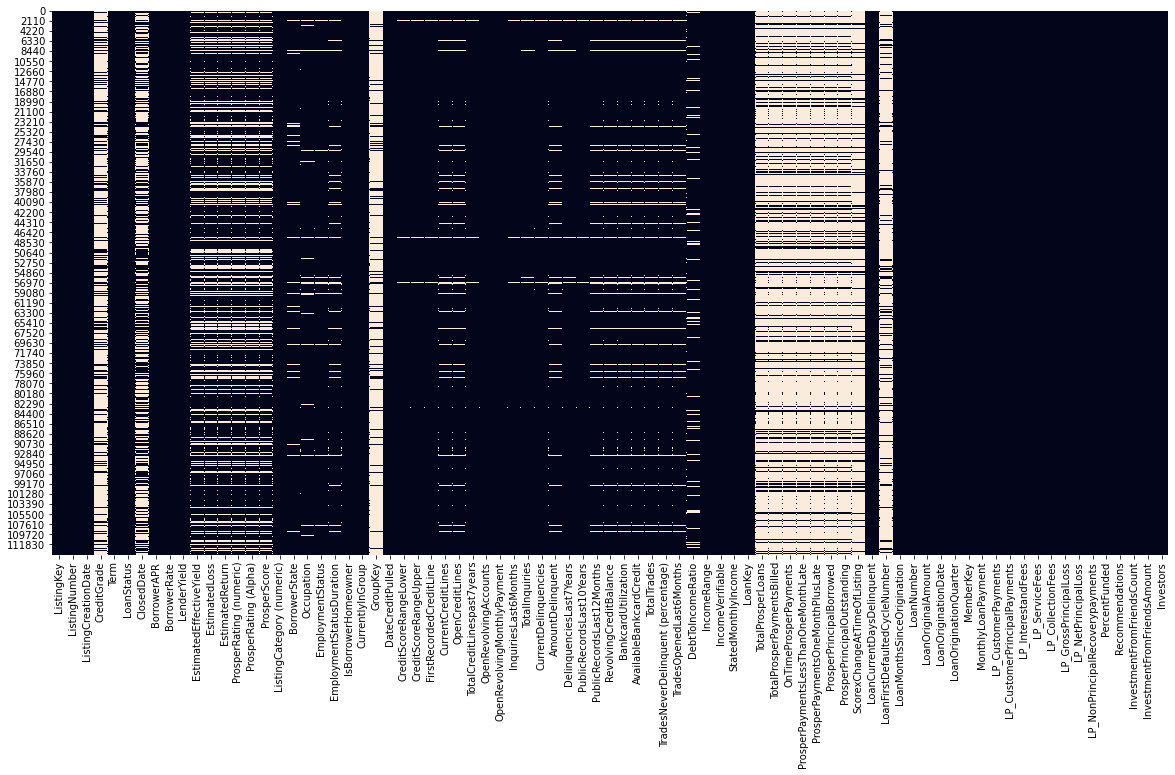

In [10]:
# Visualisation of missing value fo each column
plt.figure(figsize=(20,10))
sb.heatmap(df.isna(),cbar=False)

In [11]:
## Pourcetage des valeurs manquantes trié par ordre coissant
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

ListingKey                             0.000000
InvestmentFromFriendsAmount            0.000000
IncomeRange                            0.000000
IncomeVerifiable                       0.000000
StatedMonthlyIncome                    0.000000
                                         ...   
ProsperPaymentsOneMonthPlusLate        0.806165
ProsperPaymentsLessThanOneMonthLate    0.806165
ScorexChangeAtTimeOfListing            0.833873
LoanFirstDefaultedCycleNumber          0.851216
GroupKey                               0.882909
Length: 81, dtype: float64

In [12]:
df = df[df.columns[df.isna().sum()/df.shape[0] <0.50]] # pour ne retions que les colonnes qui ont moins de 50% de valeurs manquantes
df.head()

,ListingKey,ListingNumber,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,LoanCurrentDaysDelinquent,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263,36,Completed,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,2007-08-26 18:41:46.780,640.0,659.0,2001-10-11,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,0,78,19141,9425,2007-09-12,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900,36,Current,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,2014-02-27 08:28:14.000,680.0,699.0,1996-03-18,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,0,0,134815,10000,2014-03-03,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090,36,Completed,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,2007-01-02 14:09:10.060,480.0,499.0,2002-07-27,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,0,86,6466,3001,2007-01-17,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010,36,Current,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,2012-10-22 11:02:32.000,800.0,819.0,1983-02-28,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,0,16,77296,10000,2012-11-01,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097,36,Current,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN,Executive,Employed,44.0,True,False,2013-09-14 18:38:44.000,680.0,699.0,2004-02-20,19.0,19.0,49.0,6,220.0,1.0,9.0,0.0,0.0,0.0,0.0,0.0,6193.0,0.81,695.0,39.0,0.95,2.0,0.26,"$100,000+",True,9583.333333,A180369302188889200689E,0,6,102670,15000,2013-09-20,Q3 2013,36CE356043264555721F06C,563.97,2819.85,1563.22,1256.63,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [13]:
df.shape

(113937, 69)

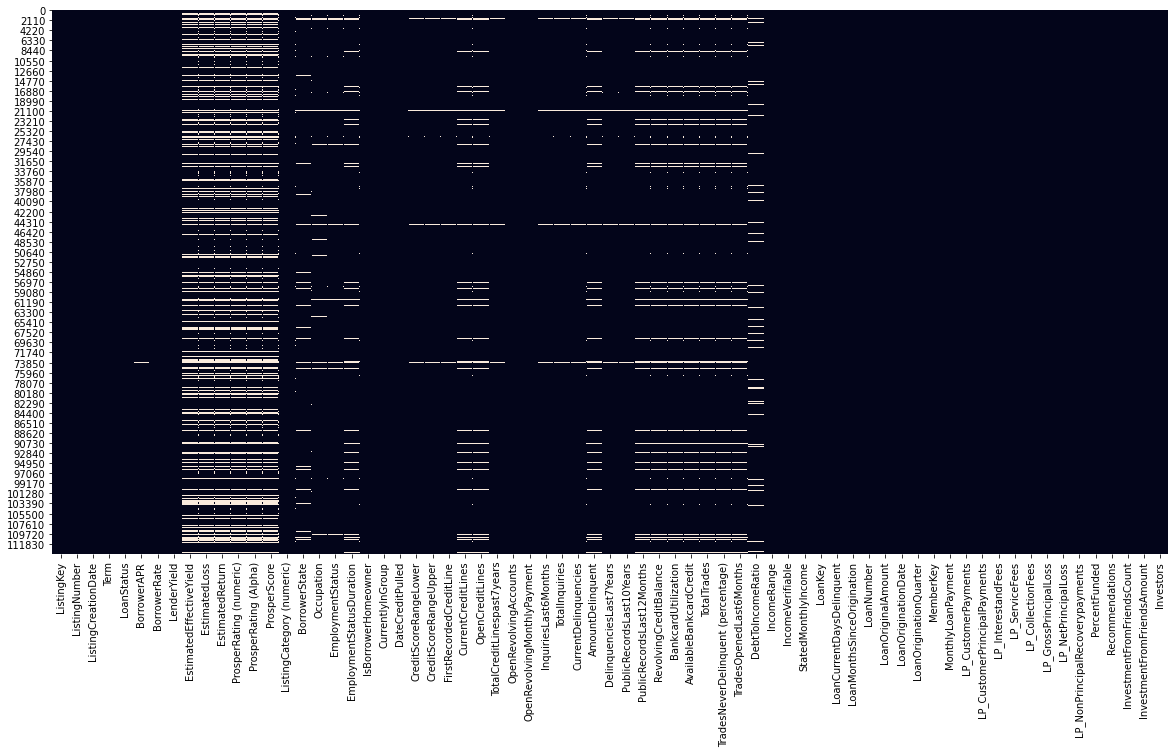

In [14]:
# Visualisation à nouveau de la quantité de données manquantes dans chaque colonne
plt.figure(figsize=(20,10))
sb.heatmap(df.isna(),cbar=False) ; 

In [15]:
## Pourcetage des valeurs manquantes trié par ordre coissant
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

ListingKey                     0.000000
InvestmentFromFriendsAmount    0.000000
IncomeRange                    0.000000
IncomeVerifiable               0.000000
StatedMonthlyIncome            0.000000
                                 ...   
ProsperRating (numeric)        0.255264
ProsperRating (Alpha)          0.255264
ProsperScore                   0.255264
EstimatedEffectiveYield        0.255264
EstimatedReturn                0.255264
Length: 69, dtype: float64

In [16]:
## Pourcetage des valeurs manquantes trié par ordre coissant
df.columns[(df.isna().sum()/df.shape[0])>0.25]

Index(['EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn',
       'ProsperRating (numeric)', 'ProsperRating (Alpha)', 'ProsperScore'],
      dtype='object')

Après cette, suppression des colonnes plus de 50% de valeurs manquantes, les colonnes avec le plus de valeurs manquantes sont 'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn','ProsperRating (numeric)', 'ProsperRating (Alpha)',  et 'ProsperScore'  avec 25.5264% de valeurs manquantes ; Ces colonnes corresopndents aux colonnes pour lesquelles 
à présent supprimons toutes les lignes avec données manquantes et voyons le nombre qu'il nous reste 'ProsperRating (Alpha)' est non indiqué (applicable aux prêts accordés après Juillet 2009) ; <br>
Nous allons donc séparer le dataset en deux, **le premier pour les prêts accordés jusqu'à fin juillet 2009** et **le second pour les prêts accordés après juillet 2009**

In [17]:
df[df['LoanOriginationDate']<'2009-08-01'].shape

(28973, 69)

In [18]:
# Séparation du dataset en 2 
df1 = df[df['LoanOriginationDate']<'2009-08-01'] # df1 contains data for loans made up to the end of July 2009
print("Dimensions de df1 : ", df1.shape)
df2 = df[df['LoanOriginationDate']>='2009-08-01'] # df1 contains data for loans issued after July 2009
print("Dimensions de df2 : ", df2.shape)

Dimensions de df1 :  (28973, 69)
Dimensions de df2 :  (84964, 69)


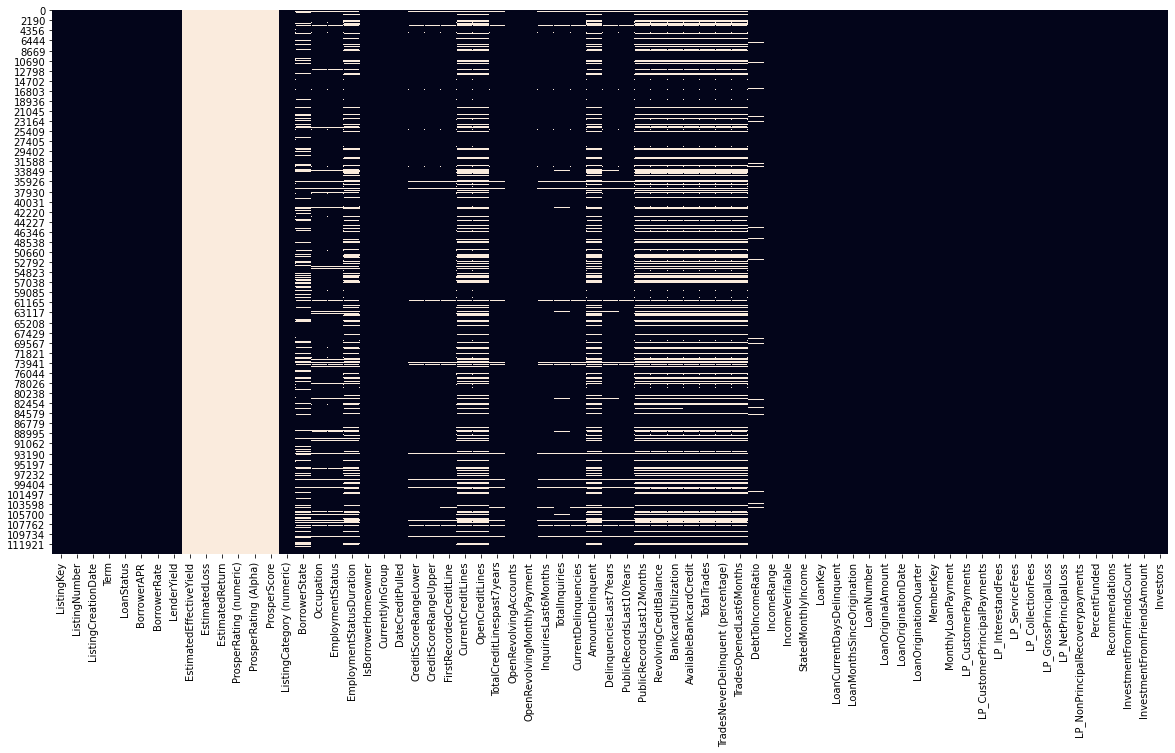

In [19]:
# Visualisation à nouveau de la quantité de données manquantes dans chaque colonne pour df 1
plt.figure(figsize=(20,10))
sb.heatmap(df1.isna(),cbar=False) ; 

In [20]:
## Pourcetage des valeurs manquantes trié par ordre coissant pour df1
(df1.isna().sum()/df1.shape[0]).sort_values(ascending=True)

ListingKey                     0.000000
InvestmentFromFriendsAmount    0.000000
IncomeRange                    0.000000
IncomeVerifiable               0.000000
StatedMonthlyIncome            0.000000
                                 ...   
ProsperRating (numeric)        0.999448
ProsperRating (Alpha)          0.999448
ProsperScore                   0.999448
EstimatedEffectiveYield        0.999448
EstimatedReturn                0.999448
Length: 69, dtype: float64

Nous constatons que les colonnes 'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn','ProsperRating (numeric)', 'ProsperRating (Alpha)', et 'ProsperScore'  n'ont pas de valeurs pour df1, nous allons les supprimer pour la suite

In [21]:
df1.drop(['EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn','ProsperRating (numeric)', 'ProsperRating (Alpha)', 'ProsperScore'],axis=1,inplace=True)
## Pourcetage des valeurs manquantes trié par ordre coissant pour df1
(df1.isna().sum()/df1.shape[0]).sort_values(ascending=True)

ListingKey                   0.000000
IncomeVerifiable             0.000000
StatedMonthlyIncome          0.000000
LoanKey                      0.000000
LoanCurrentDaysDelinquent    0.000000
                               ...   
CurrentCreditLines           0.262451
BankcardUtilization          0.262451
RevolvingCreditBalance       0.262451
EmploymentStatusDuration     0.262520
AmountDelinquent             0.263073
Length: 63, dtype: float64

# N.B : 
## Pour la suite de ce travail, nous allons utiliser le df2 qui contient les données des prêt après Juillet 2009 car il contient plus de données que df1 en terme d'enregistrement et de valeurs manquantes ;
## Les mêmes analyses peuvent être reproduite sur le df1 dans la limite des données disponibles ; 
## Aussi, nous allons étudier les prêts qui ne sont plus courant pour éssayer de voir l'influence des variables sur le statut final d'un prêt

In [22]:
df2_copy_0 = df2.copy()
df2 = df2[df2['LoanStatus']!='Current']
print(df2.shape)

(28388, 69)


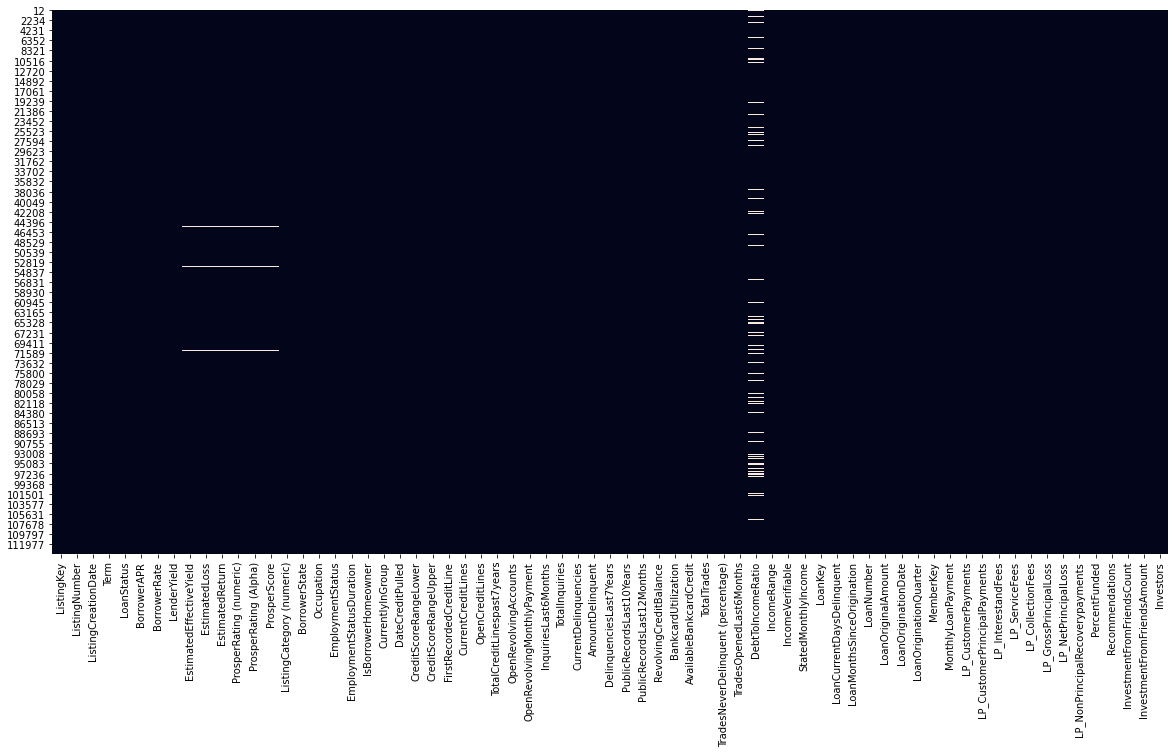

In [23]:
# Visualisation à nouveau de la quantité de données manquantes dans chaque colonne pour df 2
plt.figure(figsize=(20,10))
sb.heatmap(df2.isna(),cbar=False) ; 

In [24]:
## Pourcetage des valeurs manquantes trié par ordre coissant pour df2
(df2.isna().sum()/df2.shape[0]).sort_values(ascending=True)

ListingKey                   0.000000
PublicRecordsLast12Months    0.000000
RevolvingCreditBalance       0.000000
BankcardUtilization          0.000000
AvailableBankcardCredit      0.000000
                               ...   
ProsperRating (Alpha)        0.004474
ProsperScore                 0.004474
EstimatedEffectiveYield      0.004474
EstimatedLoss                0.004474
DebtToIncomeRatio            0.113005
Length: 69, dtype: float64

La colonne avec le plus de données manquantes est "" avec 8,59% de valeurs manquantes ; ce champ intique Le ratio dette/revenu de l'emprunteur au moment où le profil de crédit a été établi. Cette valeur est Null si le ratio dette/revenu n'est pas disponible. Cette valeur est plafonnée à 10,01 (tout ratio dette/revenu supérieur à 1000 % sera renvoyé sous la forme 1001 %). Etant donné, que nous n'avons pas un moyen de calculer cette valeur et pour ne pas corrumpre nos données avec de mauvaises valeurs, nous allons les lignes avec ces valeurs manquantes ;  nous allons suppriméer toutes les lignes ayant des valeurs manquantes jusqu'à ce niveau.

In [25]:
df2.dropna(inplace=True)
df2.shape

(25031, 69)

Il nous reste 76201 enreigistrement et 69 colonnes dans notre df2 ; 

In [26]:
# Suppression des lignes dupliquées éventuellement
df2.drop_duplicates(inplace=True)
df2.shape

(25031, 69)

Aucune duplication dans notre df2

In [27]:
# Suppression des colonnes non utiles 
# df2.drop(['LoanKey','ListingKey','MemberKey','ListingNumber','BorrowerState','Occupation','ListingCategory (numeric)','FirstRecordedCreditLine','OpenCreditLines','TotalCreditLinespast7years','OpenRevolvingAccounts','OpenRevolvingMonthlyPayment','InquiriesLast6Months','TotalInquiries','CurrentDelinquencies','AmountDelinquent','LoanOriginationQuarter'],axis=1,inplace=True)
# df2.shape

In [28]:
df2.sample(2)

,ListingKey,ListingNumber,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,LoanCurrentDaysDelinquent,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
21893,163B3543419938831870A71,578642,2012-04-14 06:32:25.573,60,Chargedoff,0.23318,0.2085,0.1985,0.1950,0.0565,0.1385,5.0,B,8.0,1,MA,Homemaker,Employed,138.0,False,False,2012-03-30 06:34:39,640.0,659.0,1999-04-13,1.0,1.0,15.0,1,25.0,1.0,2.0,1.0,0.0,60.0,1.0,0.0,122.0,0.40,178.0,11.0,0.63,0.0,0.07,"$50,000-74,999",True,5250.000000,C67E3649894839222DBF12A,378,23,64363,13000,2012-04-25,Q2 2012,21DF35427049768340A3118,350.60,3155.40,1194.66,1960.74,-94.04,0.0,11805.34,11805.34,0.0,1.0,0,0,0.0,207
11259,E6A3353797115015439119F,557545,2012-02-08 22:16:12.123,36,Completed,0.35797,0.3177,0.3077,0.2896,0.1650,0.1246,1.0,HR,3.0,1,WV,Accountant/CPA,Employed,316.0,False,False,2012-02-08 22:16:06,680.0,699.0,1990-05-29,14.0,12.0,35.0,12,875.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,43459.0,0.89,4926.0,34.0,1.00,2.0,0.42,"$25,000-49,999",True,3333.333333,C90F36436802432902BABFA,0,25,61451,4000,2012-02-29,Q1 2012,006235390920363652A6855,173.71,4538.57,4000.00,538.57,-16.96,0.0,0.00,0.00,0.0,1.0,0,0,0.0,2


In [29]:
df2.IncomeRange.value_counts()

$25,000-49,999    8032
$50,000-74,999    7381
$75,000-99,999    4074
$100,000+         3908
$1-24,999         1635
Not employed         1
Name: IncomeRange, dtype: int64

### Sélection des caractérisques ( features selection)
Dans la cellule qui suit, nous allons sélectinner les variables avec lesquelles nous allons travailler dans la suite en supprimant les variables qui sont corrélées entre elles à plus de 90% et à moins de 10%

In [30]:
# copie du df2 avant transformation des colonnes
df2_copy = df2.copy()

# Selection des colonnes numériques
numeric_col=df2.select_dtypes(include=np.number).columns.tolist() 
# df.select_dtypes(include=np.number) # to get a ddf with only numeric columns
#Sélection des colonnes non numériques
cat_col= df2.select_dtypes(exclude=np.number).columns.tolist() 

# Encodage de toutes les colonnes catégorielles en numériques
for col in cat_col:
    df2_copy[col] = df2[col].astype('category').cat.codes
    
# Création de la matrice de correlation
corr_matrix = df2.corr().abs()

# Selection du triangle supérieure de la matrice de correlation
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Sélection des features avec une correlation supérieure à 90%
to_drop1 = [column for column in upper.columns if any(upper[column] > 0.90)]
# Sélection des features avec une correlation inférieure à 1%
to_drop2 = [column for column in upper.columns if any(upper[column] < 0.01)]
# Drop features 
df2.drop(to_drop1, axis=1, inplace=True, errors='ignore')
df2.drop(to_drop2, axis=1, inplace=True, errors='ignore')

In [31]:
# Affichage pour vérification
print(len(df2.columns.to_list()))
df2.columns.to_list()

23


['ListingKey',
 'ListingNumber',
 'ListingCreationDate',
 'Term',
 'LoanStatus',
 'EstimatedEffectiveYield',
 'EstimatedReturn',
 'ProsperRating (Alpha)',
 'ProsperScore',
 'BorrowerState',
 'Occupation',
 'EmploymentStatus',
 'DateCreditPulled',
 'FirstRecordedCreditLine',
 'CurrentCreditLines',
 'TotalCreditLinespast7years',
 'CurrentDelinquencies',
 'DelinquenciesLast7Years',
 'IncomeRange',
 'LoanKey',
 'LoanOriginationDate',
 'LoanOriginationQuarter',
 'MemberKey']

A ce stade, nous allons :
- supprimer manuellement quelques variables que nous jugeons non pertinentes pour nos analayses parmi les 26 variables restantes
- Ajouter manuellement quelques variables que nous jugeons  pertinentes pour nos analayses ; ce sont **DebtToIncomeRatio** (Le ratio dette/revenu de l'emprunteur au moment où le profil de crédit a été établi. Cette valeur est plafonnée à 10,01 (tout ratio dette/revenu supérieur à 1000 % sera renvoyé sous la forme 1001 %) ; **LoanOriginalAmount** (Montant initial du prêt)

In [32]:
df2.drop(['ListingKey','ListingNumber','ListingCreationDate','ListingCreationDate','DateCreditPulled','LoanKey','LoanOriginationDate','MemberKey'],axis=1,inplace=True,errors='ignore')
df2['DebtToIncomeRatio']= df2_copy['DebtToIncomeRatio']
df2['LoanOriginalAmount'] = df2_copy['LoanOriginalAmount']

In [33]:
print(df2.shape)
df2.info()

(25031, 18)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 25031 entries, 12 to 113935
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Term                        25031 non-null  int64         
 1   LoanStatus                  25031 non-null  object        
 2   EstimatedEffectiveYield     25031 non-null  float64       
 3   EstimatedReturn             25031 non-null  float64       
 4   ProsperRating (Alpha)       25031 non-null  object        
 5   ProsperScore                25031 non-null  float64       
 6   BorrowerState               25031 non-null  object        
 7   Occupation                  25031 non-null  object        
 8   EmploymentStatus            25031 non-null  object        
 9   FirstRecordedCreditLine     25031 non-null  datetime64[ns]
 10  CurrentCreditLines          25031 non-null  float64       
 11  TotalCreditLinespast7years  25031 non-nu

In [34]:
# Selection des colonnes numériques
numeric_col=df2.select_dtypes(include=np.number).columns.tolist()
print('Before rename')
print('Variables numériques :',len(numeric_col) , numeric_col)
# df.select_dtypes(include=np.number) # to get a ddf with only numeric columns
#Sélection des colonnes non numériques
cat_col= df2.select_dtypes(exclude=np.number).columns.tolist() 
print('Variables catégorielles :',len(cat_col) , cat_col)

# Rename some column to have a correct name
df2.rename(columns={'ListingCategory (numeric)':'ListingCategoryNumeric','ProsperRating (Alpha)':'ProsperRatingAlpha','TradesNeverDelinquent (percentage)':'TradesNeverDelinquentPercentage'},inplace=True)

# Selection des colonnes numériques
numeric_col=df2.select_dtypes(include=np.number).columns.tolist()
print('After rename')
print('Variables numériques :',len(numeric_col) , numeric_col)
# df.select_dtypes(include=np.number) # to get a ddf with only numeric columns
#Sélection des colonnes non numériques
cat_col= df2.select_dtypes(exclude=np.number).columns.tolist() 
print('Variables catégorielles :',len(cat_col) , cat_col)

Before rename
Variables numériques : 10 ['Term', 'EstimatedEffectiveYield', 'EstimatedReturn', 'ProsperScore', 'CurrentCreditLines', 'TotalCreditLinespast7years', 'CurrentDelinquencies', 'DelinquenciesLast7Years', 'DebtToIncomeRatio', 'LoanOriginalAmount']
Variables catégorielles : 8 ['LoanStatus', 'ProsperRating (Alpha)', 'BorrowerState', 'Occupation', 'EmploymentStatus', 'FirstRecordedCreditLine', 'IncomeRange', 'LoanOriginationQuarter']
After rename
Variables numériques : 10 ['Term', 'EstimatedEffectiveYield', 'EstimatedReturn', 'ProsperScore', 'CurrentCreditLines', 'TotalCreditLinespast7years', 'CurrentDelinquencies', 'DelinquenciesLast7Years', 'DebtToIncomeRatio', 'LoanOriginalAmount']
Variables catégorielles : 8 ['LoanStatus', 'ProsperRatingAlpha', 'BorrowerState', 'Occupation', 'EmploymentStatus', 'FirstRecordedCreditLine', 'IncomeRange', 'LoanOriginationQuarter']


In [35]:
print(len(df2.columns.tolist()))
df2.columns.tolist()

18


['Term',
 'LoanStatus',
 'EstimatedEffectiveYield',
 'EstimatedReturn',
 'ProsperRatingAlpha',
 'ProsperScore',
 'BorrowerState',
 'Occupation',
 'EmploymentStatus',
 'FirstRecordedCreditLine',
 'CurrentCreditLines',
 'TotalCreditLinespast7years',
 'CurrentDelinquencies',
 'DelinquenciesLast7Years',
 'IncomeRange',
 'LoanOriginationQuarter',
 'DebtToIncomeRatio',
 'LoanOriginalAmount']

In [36]:
# Transformation des colonnes numériques catégorielle en colonne =s categorielle
# num_to_cat = ['ListingCategoryNumeric','BorrowerState','Occupation','EmploymentStatus','ProsperScore']
num_to_cat = ['BorrowerState','Occupation','EmploymentStatus','ProsperScore']
for col in num_to_cat:
    df2[col]=df2[col].astype('category')

df2.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25031 entries, 12 to 113935
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Term                        25031 non-null  int64         
 1   LoanStatus                  25031 non-null  object        
 2   EstimatedEffectiveYield     25031 non-null  float64       
 3   EstimatedReturn             25031 non-null  float64       
 4   ProsperRatingAlpha          25031 non-null  object        
 5   ProsperScore                25031 non-null  category      
 6   BorrowerState               25031 non-null  category      
 7   Occupation                  25031 non-null  category      
 8   EmploymentStatus            25031 non-null  category      
 9   FirstRecordedCreditLine     25031 non-null  datetime64[ns]
 10  CurrentCreditLines          25031 non-null  float64       
 11  TotalCreditLinespast7years  25031 non-null  float64 

In [37]:
# Selection des colonnes numériques
numeric_col=df2.select_dtypes(include=np.number).columns.tolist()
print('After rename')
print('Variables numériques :',len(numeric_col) , numeric_col)
# df.select_dtypes(include=np.number) # to get a ddf with only numeric columns
#Sélection des colonnes non numériques
cat_col= df2.select_dtypes(exclude=np.number).columns.tolist() 
print('Variables catégorielles :',len(cat_col) , cat_col)

After rename
Variables numériques : 9 ['Term', 'EstimatedEffectiveYield', 'EstimatedReturn', 'CurrentCreditLines', 'TotalCreditLinespast7years', 'CurrentDelinquencies', 'DelinquenciesLast7Years', 'DebtToIncomeRatio', 'LoanOriginalAmount']
Variables catégorielles : 9 ['LoanStatus', 'ProsperRatingAlpha', 'ProsperScore', 'BorrowerState', 'Occupation', 'EmploymentStatus', 'FirstRecordedCreditLine', 'IncomeRange', 'LoanOriginationQuarter']


### What is the structure of your dataset?

- My final dataset have 76201 rows and 21 variables dont 11 numérique, 9 catégorielle et 1 datetime
- Les Variables numériques (9) : 'Term', 'BorrowerAPR', 'EstimatedReturn', 'EmploymentStatusDuration', 'CreditScoreRangeLower', 'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TradesNeverDelinquentPercentage'
- Les Variables catégorielles (10) : 'LoanStatus', 'ProsperRatingAlpha', 'ProsperScore', 'ListingCategoryNumeric', 'BorrowerState', 'Occupation', 'EmploymentStatus', 'IncomeRange', 'LoanOriginationQuarter'
- Variables de type datetime (1) :  'FirstRecordedCreditLine' 

### What is/are the main feature(s) of interest in your dataset?

> The main features that interest me in my dataset is "LoanStatus", "EstimatedLoss" and "EstimatedReturn"

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think that the following features  after cleaning will be useful for my analysis : 
- Les Variables numériques (11) : 'Term', 'BorrowerAPR', 'EstimatedReturn', 'EmploymentStatusDuration', 'CreditScoreRangeLower', 'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TradesNeverDelinquentPercentage', 'DebtToIncomeRatio' , 'LoanOriginalAmount'
- Les Variables catégorielles (10) : 'LoanStatus', 'ProsperRatingAlpha', 'ProsperScore', 'ListingCategoryNumeric', 'BorrowerState', 'Occupation', 'EmploymentStatus', 'IncomeRange', 'LoanOriginationQuarter'
- Variables de type datetime (1) :  'FirstRecordedCreditLine'

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 




>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

In [38]:
df2.describe()

,Term,EstimatedEffectiveYield,EstimatedReturn,CurrentCreditLines,TotalCreditLinespast7years,CurrentDelinquencies,DelinquenciesLast7Years,DebtToIncomeRatio,LoanOriginalAmount
count,25031.000000,25031.000000,25031.000000,25031.000000,25031.000000,25031.000000,25031.000000,25031.000000,25031.000000
mean,38.526467,0.175711,0.106812,9.762974,27.208621,0.394591,3.626383,0.251839,6674.693340
std,10.813884,0.079477,0.037018,5.317745,14.079951,1.284836,8.988402,0.390880,4985.171789
min,12.000000,-0.181600,-0.181600,0.000000,2.000000,0.000000,0.000000,0.000000,1000.000000
25%,36.000000,0.112200,0.078200,6.000000,17.000000,0.000000,0.000000,0.130000,3000.000000
50%,36.000000,0.171500,0.111500,9.000000,25.000000,0.000000,0.000000,0.200000,5000.000000
75%,36.000000,0.243700,0.135700,13.000000,35.000000,0.000000,2.000000,0.300000,9000.000000
max,60.000000,0.319900,0.266700,59.000000,124.000000,32.000000,99.000000,10.010000,35000.000000


### Quelques transformations de certaines colonnes catégorielles en colonnes catégorielles ordinales ordonnées

In [39]:
# Transformation de la colonne "LoanStatus" en colonne catégorielle ordinale ordonnée

sedan_classes = ['Completed','Current','FinalPaymentInProgress', 'Chargedoff','Past Due (1-15 days)', 'Past Due (16-30 days)', 'Past Due (31-60 days)', 'Past Due (61-90 days)', 'Past Due (91-120 days)' , 'Past Due (>120 days)' , 'Defaulted']
# Renvoie les types pour sedan_classes avec les catégories et la commande
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)
#Utilisation de pandas.astype() pour convertir la colonne « LoanStatus » d'un type d'objet simple en un type catégorique ordonné
df2['LoanStatus'] = df2['LoanStatus'].astype(vclasses);
print('success')
df2.LoanStatus.value_counts()

success


Completed                 17674
Chargedoff                 4443
Defaulted                   884
Past Due (1-15 days)        714
Past Due (31-60 days)       322
Past Due (91-120 days)      277
Past Due (61-90 days)       275
Past Due (16-30 days)       241
FinalPaymentInProgress      187
Past Due (>120 days)         14
Current                       0
Name: LoanStatus, dtype: int64

In [40]:
# Transformation de la colonne "IncomeRange" en colonne catégorielle ordinale ordonnée
sedan_classes = ['Not employed', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']
# Renvoie les types pour sedan_classes avec les catégories et la commande
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)
#Utilisation de pandas.astype() pour convertir la colonne « IncomeRange » d'un type d'objet simple en un type catégorique ordonné
df2['IncomeRange'] = df2['IncomeRange'].astype(vclasses);
df2.IncomeRange.value_counts()

$25,000-49,999    8032
$50,000-74,999    7381
$75,000-99,999    4074
$100,000+         3908
$1-24,999         1635
Not employed         1
Name: IncomeRange, dtype: int64

In [41]:
# Transformation de la colonne "ProsperRatingAlpha" en colonne catégorielle ordinale ordonnée

sedan_classes = ['HR', 'E', 'D', 'C', 'B', 'A', 'AA']
# Renvoie les types pour sedan_classes avec les catégories et la commande
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)
#Utilisation de pandas.astype() pour convertir la colonne « ProsperRatingAlpha » d'un type d'objet simple en un type catégorique ordonné
df2['ProsperRatingAlpha'] = df2['ProsperRatingAlpha'].astype(vclasses);
print('success')
df2.ProsperRatingAlpha.value_counts()

success


D     5525
C     3899
E     3570
A     3563
B     3465
HR    3265
AA    1744
Name: ProsperRatingAlpha, dtype: int64

In [42]:
# Transformation de la colonne "ProsperScore" en colonne catégorielle ordinale ordonnée

sedan_classes = np.arange(1,12,1)

# Renvoie les types pour sedan_classes avec les catégories et la commande
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)
#Utilisation de pandas.astype() pour convertir la colonne « ProsperScore » d'un type d'objet simple en un type catégorique ordonné
df2['ProsperScore'] = df2['ProsperScore'].astype(vclasses);
print('success')
df2.ProsperScore.value_counts()

success


8     4508
6     3773
9     3099
7     3085
5     3081
4     2609
10    1645
3     1481
2     1252
1      463
11      35
Name: ProsperScore, dtype: int64

In [43]:
# Evaluation de la colonne "LoanOriginationQuarter"
df2['LoanOriginationQuarter'].value_counts()

Q3 2012    2217
Q2 2012    2202
Q4 2011    2157
Q1 2012    2070
Q3 2011    1837
Q2 2011    1577
Q4 2012    1464
Q1 2011    1434
Q4 2010    1380
Q2 2010    1325
Q4 2009    1265
Q3 2010    1112
Q1 2010    1083
Q2 2013    1002
Q1 2013     900
Q3 2013     817
Q4 2013     585
Q3 2009     505
Q1 2014      99
Name: LoanOriginationQuarter, dtype: int64

Nous allons séparer cette colonnes en deux colonnes, 1 pour le le semestre et l'autre pour l'année

In [44]:
# Séparation avec df.split()
df2[['semester','year']] = df2['LoanOriginationQuarter'].str.split(' ',expand=True)
# Vérification
df2.sample(2)
print(df2.semester.value_counts())
print(df2.year.value_counts())

Q4    6851
Q3    6488
Q2    6106
Q1    5586
Name: semester, dtype: int64
2012    7953
2011    7005
2010    4900
2013    3304
2009    1770
2014      99
Name: year, dtype: int64


In [45]:
# Transformation de la colonne "Semester" en colonne catégorielle ordinale ordonnée
sedan_classes = ['Q1','Q2','Q3','Q4']
# Renvoie les types pour sedan_classes avec les catégories et la commande
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)
#Utilisation de pandas.astype() pour convertir la colonne « semester » d'un type d'objet simple en un type catégorique ordonné
df2['semester'] = df2['semester'].astype(vclasses);
print('success for Semester transformation')
df2.semester.value_counts()
# sedan_classes

success for Semester transformation


Q4    6851
Q3    6488
Q2    6106
Q1    5586
Name: semester, dtype: int64

In [46]:
# Transformation de la colonne "Semester" en colonne catégorielle ordinale ordonnée
sedan_classes = ['2009','2010','2011','2012','2013','2014']
# Renvoie les types pour sedan_classes avec les catégories et la commande
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)
#Utilisation de pandas.astype() pour convertir la colonne « year » d'un type d'objet simple en un type catégorique ordonné
df2['year'] = df2['year'].astype(vclasses);
print('success for year transformation')
df2['year'].value_counts()

success for year transformation


2012    7953
2011    7005
2010    4900
2013    3304
2009    1770
2014      99
Name: year, dtype: int64

###  Save the clean dataset

In [47]:
df2.to_csv('clean_prosperLoanData.csv',index=False);

### Question 1) Quelle est la repartition des loanStatus

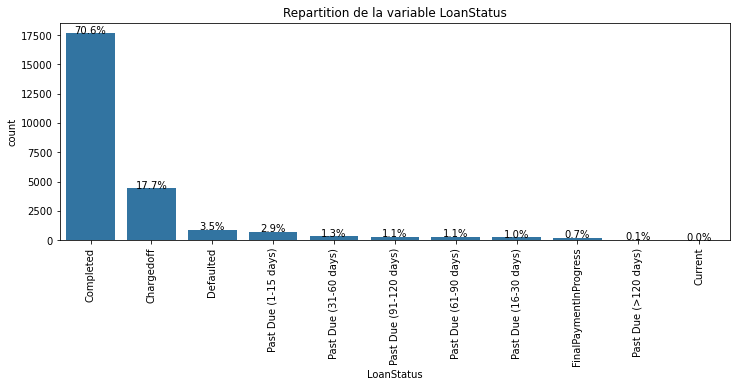

In [48]:
from matplotlib import rcParams
# Spécifier la taille de la figure en pouces, pour les axes X, et Y
rcParams['figure.figsize'] = 12,4

LoanStatus_order = df2['LoanStatus'].value_counts().index 

# choix de la palette de couleure de base
base_color = sb.color_palette()[0]
sb.countplot(data=df2, x='LoanStatus', color=base_color, order=LoanStatus_order);

# Retourner la somme de toutes les valeurs non nulles de la colonne « LoanStatus »
n_loanStatus = df2['LoanStatus'].value_counts().sum()

# Recalculer les types_counts juste pour plus de clarté.
type_counts = df2['LoanStatus'].value_counts()

# Obtenir les emplacements et les étiquettes des ticks actuels
locs, labels = plt.xticks(rotation=90)

# Boucler sur chaque paire d'emplacements et d'étiquettes
for loc, label in zip(locs, labels):

    # récupérer la propriété texte de l'étiquette pour obtenir le compte correct
    count = type_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_loanStatus)

    # imprimer l'annotation juste en dessous du haut de la barre
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')
plt.title('Repartition de la variable LoanStatus');

### Observations 1 :
- 23.2% des prêts sont complétés ; 
- La plupart des prêt sont encore en cours (67,62 %) ; 
- très que de prêts ( 1.2%) sont en défaut de payement ;
- Très peu de prêts ( 2,4%) sont des retard de payement entre 1 et plus de 120 jours ;
- Nous étudierons dans la suite le LoanStatus en fonction de la durée (Terme)

### Question 2) Quelle est la repartition des ProsperRating (Alpha)

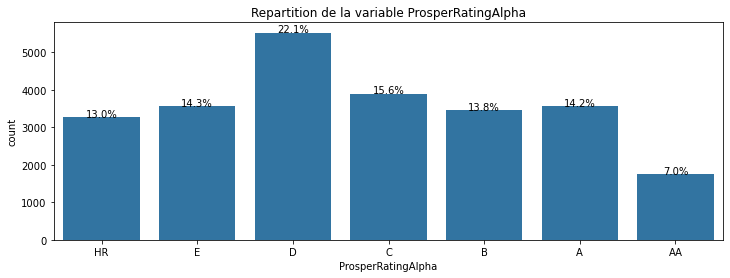

In [49]:
from matplotlib import rcParams
# Spécifier la taille de la figure en pouces, pour les axes X, et Y
# rcParams['figure.figsize'] = 12,4

# LoanStatus_order = df2['ProsperRating (Alpha)'].value_counts().index 

# choix de la palette de couleurs de base
base_color = sb.color_palette()[0]
sb.countplot(data=df2, x='ProsperRatingAlpha', color=base_color);

# Retourner la somme de toutes les valeurs non nulles de la colonne « ProsperRatingAlpha »
n_loanStatus = df2['ProsperRatingAlpha'].value_counts().sum()

# Recalculer les types_counts juste pour plus de clarté.
type_counts = df2['ProsperRatingAlpha'].value_counts()

# Obtenir les emplacements et les étiquettes des ticks actuels
locs, labels = plt.xticks(rotation=0)

# Boucler sur chaque paire d'emplacements et d'étiquettes
for loc, label in zip(locs, labels):

    # récupérer la propriété texte de l'étiquette pour obtenir le compte correct
    count = type_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_loanStatus)

    # imprimer l'annotation juste en dessous du haut de la barre
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')
plt.title('Repartition de la variable ProsperRatingAlpha') ;

### Observations 2 :
- La reparrtition des prêtss en fonctions des risques est quasi-symétrique par rapport à la valeur centre "C", On pourait dire que pour 1 prêt sur 2, le risque est moyen ;
- Nous étudierons dans la suite, le LoanStatus en fonction  du risque (ProsperRatingAlpha)
### Question 3) Quelle est la repartition des IncomeRange ?

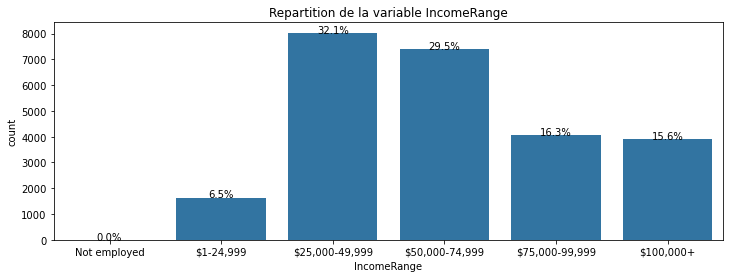

In [50]:
# Spécifier la taille de la figure en pouces, pour les axes X, et Y

# choix de la palette de couleurs de base
base_color = sb.color_palette()[0]
sb.countplot(data=df2, x='IncomeRange', color=base_color);

# Retourner la somme de toutes les valeurs non nulles de la colonne « ProsperRatingAlpha »
n_IncomeRange = df2['IncomeRange'].value_counts().sum()

# Recalculer les IncomeRange juste pour plus de clarté.
IncomeRange_counts = df2['IncomeRange'].value_counts()

# Obtenir les emplacements et les étiquettes des ticks actuels
locs, labels = plt.xticks(rotation=0)

# Boucler sur chaque paire d'emplacements et d'étiquettes
for loc, label in zip(locs, labels):

    # récupérer la propriété texte de l'étiquette pour obtenir le compte correct
    count = IncomeRange_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_IncomeRange)

    # imprimer l'annotation juste en dessous du haut de la barre
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')
plt.title('Repartition de la variable IncomeRange') ;

### Observations 3 : 
* Le plus grand nombre de prêteur appartient à la classe moyenne ( salaire annuel entre 50.000 et 74.999 dollars) , ils sont suivis par ceux de la classe moyenne inférieur ( salaire annuel entre 24.999 et 50.000 dollars) puis ceux de la classe moyenne supérieure ( salaire annuel entre 75.000 et 99.999 dollars)
* Nous étudierons dans la suite le statut des prêts en fonction du revenue annuel du prêteur

### Question 4) Quelle est la repartition des scores des prêts "ProsperScore"

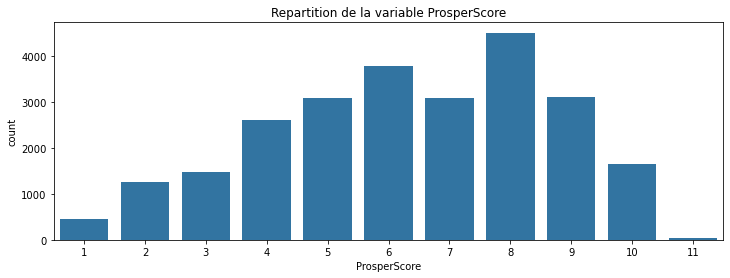

In [51]:
# choix de la palette de couleurs de base
base_color = sb.color_palette()[0]
sb.countplot(data=df2, x='ProsperScore', color=base_color);

# # Retourner la somme de toutes les valeurs non nulles de la colonne « ProsperScore »
# n_ProsperScore = df2['ProsperScore'].value_counts().sum()

# # Recalculer les ProsperScore juste pour plus de clarté.
# ProsperScore_counts = df2['ProsperScore'].value_counts()

# # Obtenir les emplacements et les étiquettes des ticks actuels
# locs, labels = plt.xticks(ticks=np.arange(1,12,1),labels=['1','2','3','4','5','6','7','8','9','10','11'], rotation=0)

# # Boucler sur chaque paire d'emplacements et d'étiquettes
# for loc, label in zip(locs, labels):

#     # récupérer la propriété texte de l'étiquette pour obtenir le compte correct
#     count = ProsperScore_counts[label.get_text()]
#     pct_string = '{:0.1f}%'.format(100*count/n_ProsperScore)

#     # imprimer l'annotation juste en dessous du haut de la barre
#     plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')
plt.title('Repartition de la variable ProsperScore') ;

### Observations 4 : 
* Les ProsperScore  >= 5 sont majoritaire,
* Nous étudierons dans la suite l'impact de cette variable (ProsperScore) sur le statut d'un prêt dans une visualisation multivarié par facetage ( nous le ferons dans la suite)

### Question 5) Quelle est la repartition  des prêts  par semestre "semester"

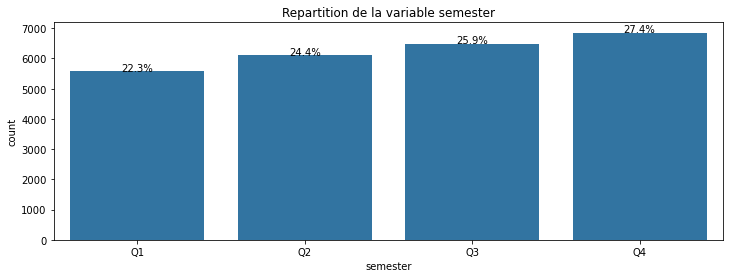

In [52]:
# choix de la palette de couleurs de base
base_color = sb.color_palette()[0]
sb.countplot(data=df2, x='semester', color=base_color);

# Retourner la somme de toutes les valeurs non nulles de la colonne « semester »
n_semester = df2['semester'].value_counts().sum()

# Recalculer les semester juste pour plus de clarté.
semester_counts = df2['semester'].value_counts()

# Obtenir les emplacements et les étiquettes des ticks actuels
locs, labels = plt.xticks(rotation=0)

# Boucler sur chaque paire d'emplacements et d'étiquettes
for loc, label in zip(locs, labels):

    # récupérer la propriété texte de l'étiquette pour obtenir le compte correct
    count = semester_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_semester)

    # imprimer l'annotation juste en dessous du haut de la barre
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')
plt.title('Repartition de la variable semester') ;

### Observations 5 : 
* Les semestres avec plus de prêts sont le semestre 4 (30.1%) , suivie par le semestre 1 (26,9%) et le semestre 3 (23,8%) , il serait interressant de voir l'impact de cette variable sur le statut d'un prêt dans une visualisation multivarié par facetage ( nous le ferons dans la suite)
* Il y'a plus de prêts en fin et en début d'année

### Question 6) Quelle est la repartition  des prêts  par année "year"

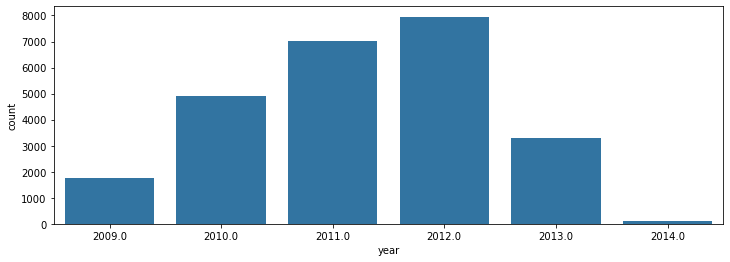

In [82]:
# choix de la palette de couleurs de base
base_color = sb.color_palette()[0]
sb.countplot(data=df2, x='year', color=base_color);

# # Retourner la somme de toutes les valeurs non nulles de la colonne « year »
# n_year = df2['year'].value_counts().sum()

# # Recalculer les year juste pour plus de clarté.
# year_counts = df2['year'].value_counts()

# # Obtenir les emplacements et les étiquettes des ticks actuels
# locs, labels = plt.xticks(rotation=0)

# # Boucler sur chaque paire d'emplacements et d'étiquettes
# for loc, label in zip(locs, labels):

#     # récupérer la propriété texte de l'étiquette pour obtenir le compte correct
#     count = year_counts[loc]
#     pct_string = '{:0.1f}%'.format(100*count/n_year)

#     # imprimer l'annotation juste en dessous du haut de la barre
#     plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')
# plt.title('Repartition de la variable year') ;

### Observations 6 : 
* Il y'a eu une augmentation du nombre de prêt de 2009 à 2012 ( de 2.3% à 41.3%) ; 
* Il y'a une chute du nombre de prêt entre 2013 et 204 ( de 41.3% à 14.0%)
* Il serait interressant de comprendre cette chute dans une visualisation multivarié par facetage ( nous le ferons dans la suite)
* Nous étudierons dans la suite, les relations entre LoanStatus par semester et par year 
### Question 7) Quelle est la repartition des durées des prêts "Term"

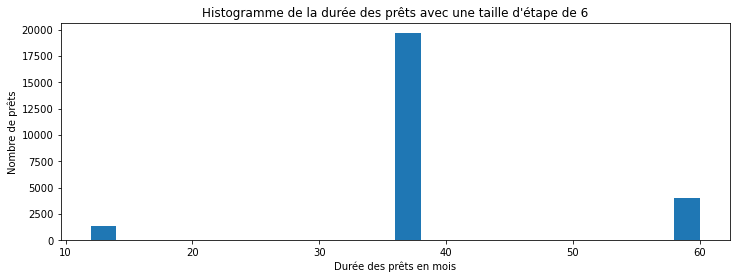

In [54]:
# Histogramme de la durée des prêts avec une taille d'étape de 6
bins = np.arange(df2['Term'].min(), df2['Term'].max()+2, 2)
plt.hist(data = df2, x = 'Term', bins = bins)
plt.xlabel('Durée des prêts en mois')
plt.ylabel('Nombre de prêts')
plt.title('Histogramme de la durée des prêts avec une taille d\'étape de 6') ;

### Observations 7 :
- La grande majorité des prêts est à long terme à savoir 36 mois pour 68,11 % et 6
 mois pour 30.02%
- Nous étudierons dans la suite , les relations entre LoanStatus , LoanOriginalAmount, DebtToIncomeRatio et Term
 
 
### Question 8 : Quelles est la distribution des autres variables  catégorielles ?
Etant donné que nous sommes dans l'analyse exploratoire, nous allons Générer ces graphiques en une seule série puis commenter ceux mettant en évidence des insight pertinents; nous allons les approfondir avec des graphiques bivariés et multivariés dans la suite

In [163]:
# Choix de la palette des couleurs
base_color = sb.color_palette()[0]
# Obtenir l'effectif global du dataset
n_loan = df2['BorrowerState'].value_counts().sum()

from matplotlib import rcParams
# Spécifier la taille de la figure en pouces, pour les axes X, et Y
rcParams['figure.figsize'] = 16,6

In [146]:
# Définition d'une fonction pour visualiser les autres variables catégorielles
def display_cat_var(df,col):
    plt.figure()
    # Obtenir les effectifs de chaque colonne
    var_counts = df[col].value_counts()
    # Obtenir les valeurs uniques de la colonne « col » par ordre de fréquence décroissante.
    var_order = var_counts.iloc[:30].index # nous avons utiliser iloc[:30] pour n'afficher que les 30 catégories ayant les meilleurs effectifs afon d'avoir un visuel lisible

    sb.countplot(data=df, x=col, color=base_color, order=var_order);


    # Recalculer les var_counts juste pour plus de clarté.
    var_counts = df[col].value_counts()

    # Obtenir les emplacements et les étiquettes des ticks actuels
    locs, labels = plt.xticks(rotation=90)

    # Boucler sur chaque paire d'emplacements et d'étiquettes
    for loc, label in zip(locs, labels):

        # récupérer la propriété texte de l'étiquette pour obtenir le compte correct
        count = var_counts[label.get_text()]
        pct_string = '{:0.1f}%'.format(100*count/n_loan)

        # imprimer l'annotation juste en dessous du haut de la barre
        plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')
    plt.ylabel('Fréquence relative (%)');
    plt.title('Distribution de la variable "{}"'.format(col))

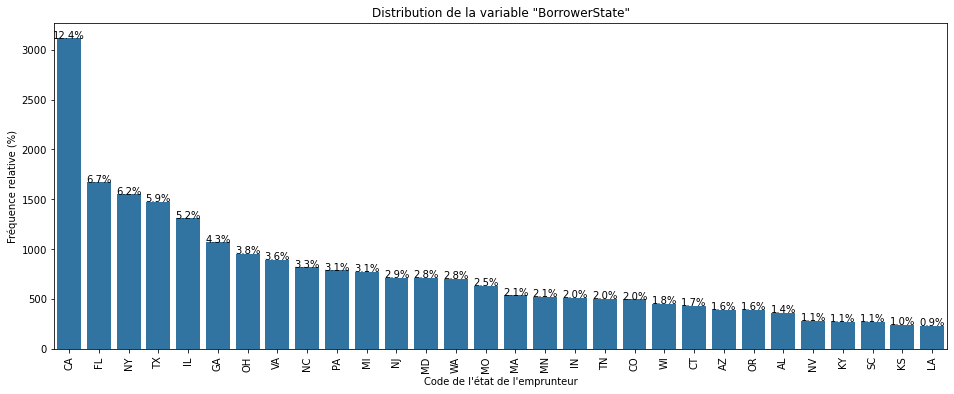

In [151]:
# Distribution de la variable BorrowerState
display_cat_var(df2,'BorrowerState')
plt.xlabel('Code de l\'état de l\'emprunteur');

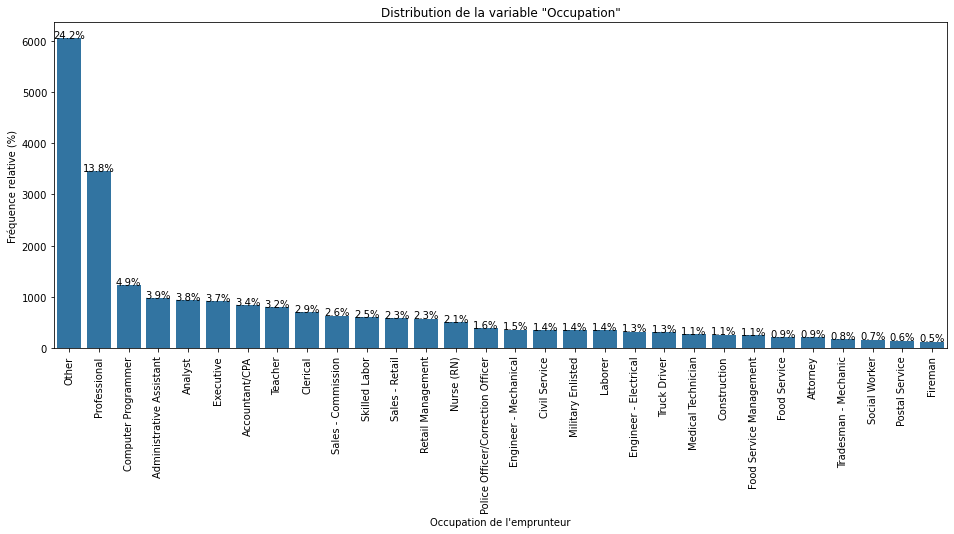

In [150]:
# Distribution de la variable Occupation
display_cat_var(df2,'Occupation')
plt.xlabel('Occupation de l\'emprunteur');

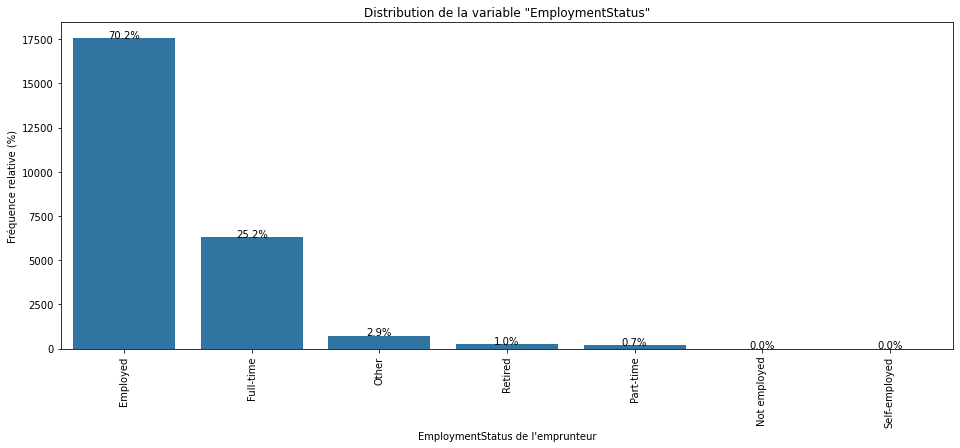

In [152]:
# Distribution de la variable EmploymentStatus
display_cat_var(df2,'EmploymentStatus')
plt.xlabel('EmploymentStatus de l\'emprunteur');

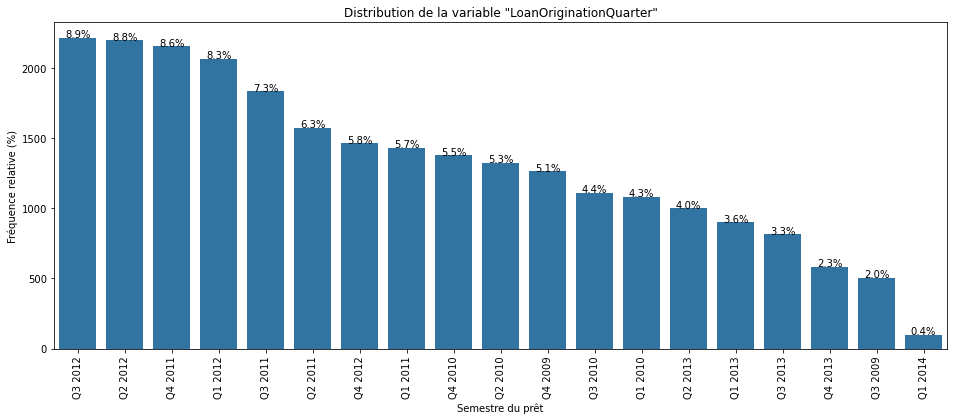

In [153]:
# Distribution de la variable LoanOriginationQuarter
display_cat_var(df2,'LoanOriginationQuarter')
plt.xlabel('Semestre du prêt');

### Observations 8: 

#### **Graphique 1:** 
* L'état avec le plus de prêteur est celui de californie, il serait interesant de verifier s'ils remboursent leur credits dans un gaphique multivarié
#### **Graphique 2:** 
* 24.3% des prêts sont accordés à des personnes dont le métier n'est pas encore repertorié, celà appelle à un meilleur travail pour repertorier tous le plus grand nombre de metier
#### **Graphique 3:** 
* Moins de 5% des prêts sont accordés à des personnes sans métier, Celà devrait inciter les prêteurs à décrocher un boulot pour augmenter leur chance de recevoir un prêt


### Question 9) Quelle est la distribution de EstimatedReturn ?

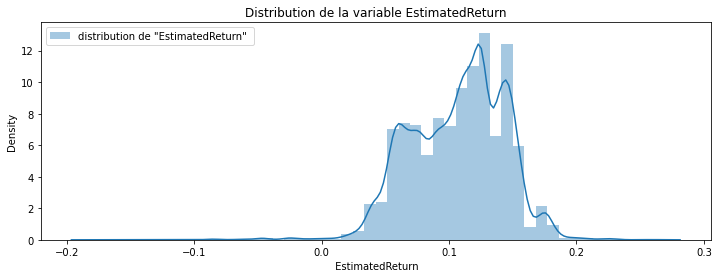

In [84]:
# plt.figure(figsize=(15,8))
sb.distplot(df2['EstimatedReturn'],label="distribution de \"EstimatedReturn\" ") ;
plt.xlabel(' EstimatedReturn')
plt.title('Distribution de la variable EstimatedReturn')
plt.legend();
plt.show()

### Observations 09: 
- Les distributions de EstimatedReturn est mono-modale symétriques à gauche; Nous en saurons plus lors de la visualisation bivarié
- L'estimation de retour est globalement supérieure au risque

### Question 10 : Quelles est la distribution des variables continue ?

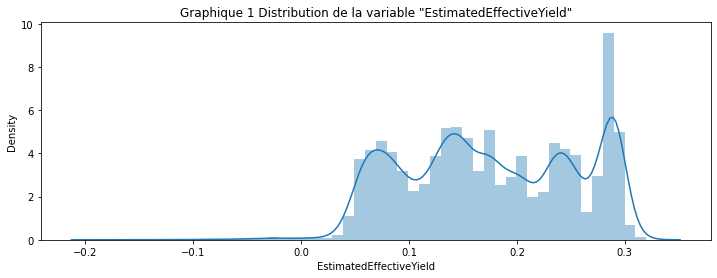

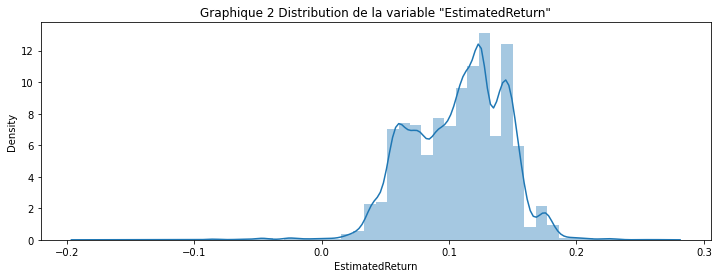

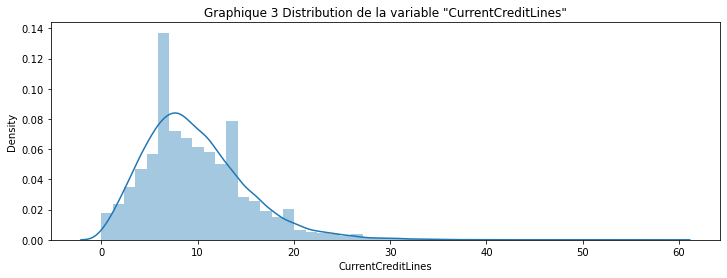

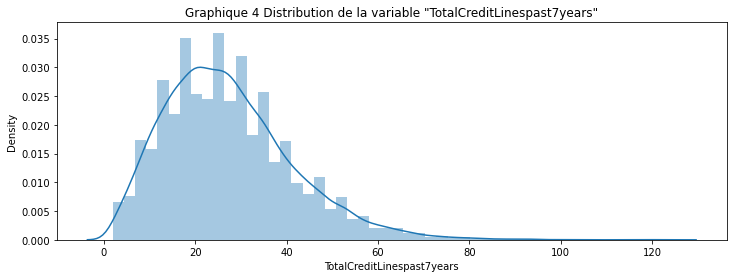

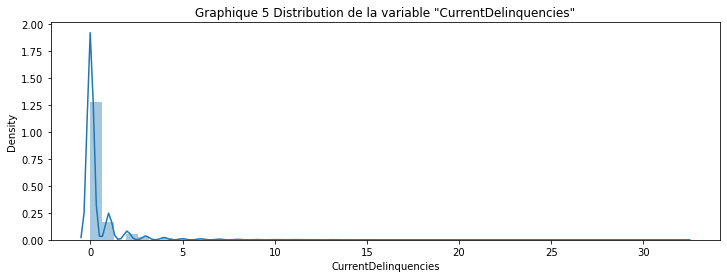

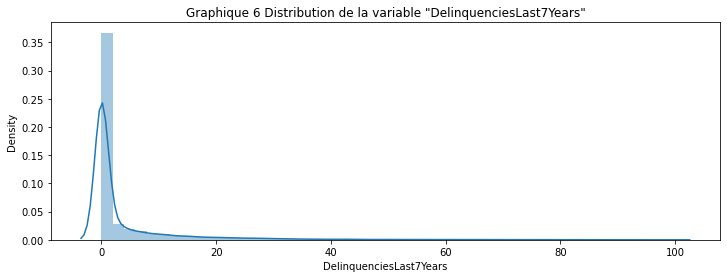

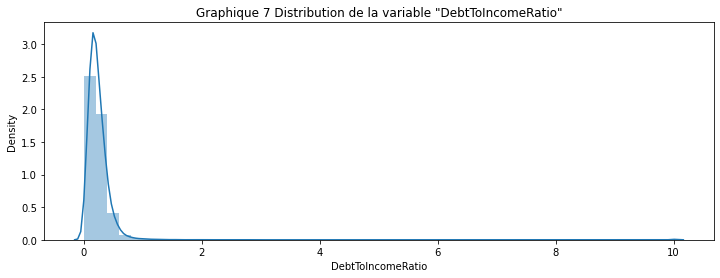

In [57]:
j = 1
for col in df2.select_dtypes('float'):
    plt.figure()
    sb.distplot(df2[col]); 
    plt.title('Graphique {} Distribution de la variable "{}"'.format(j,col))
    j = j+1

### Observations 10: 
- Le graphique 7 nous montre que le très grande majorité de empreiteurs empreinte un montant inférieur à leur revenu
- L'estimation de retour est globalement supérieure au risque

### Question 11 : Quelles est la distribution du montant des prêts (LoanOriginalAmount) ?

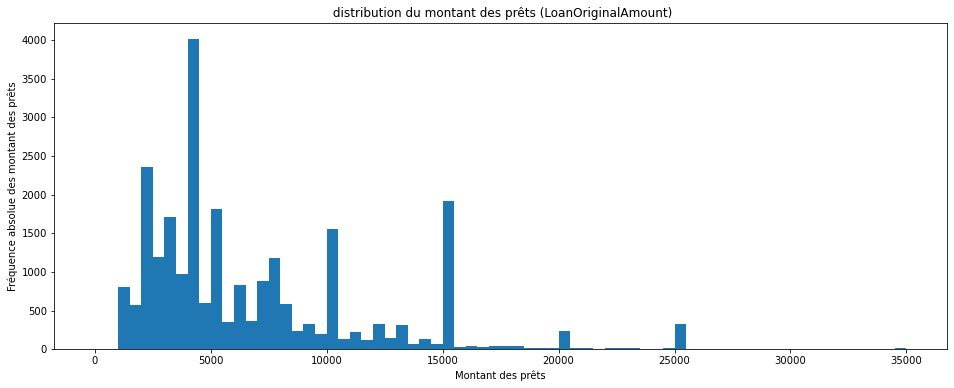

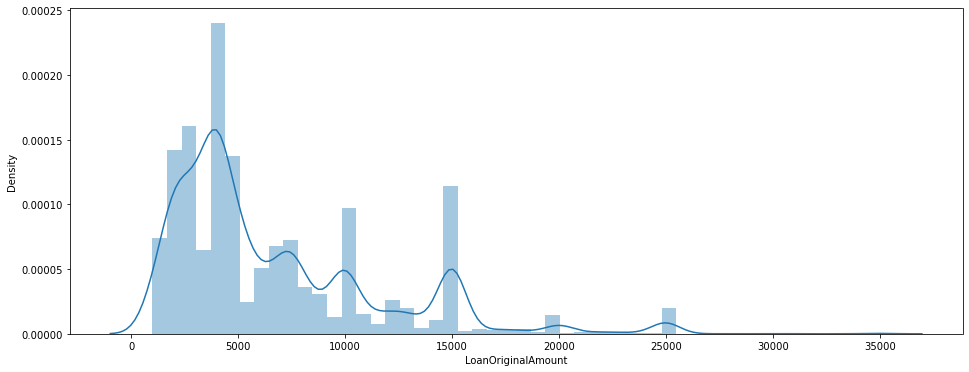

In [154]:


# Créer des cases avec une taille d'étape de 500
bins = np.arange(0, df2['LoanOriginalAmount'].max()+500, 500);
plt.hist(data = df2, x = 'LoanOriginalAmount', bins = bins);
plt.title(' distribution du montant des prêts (LoanOriginalAmount)');
plt.xlabel('Montant des prêts');
plt.ylabel('Fréquence absolue des montant des prêts')
plt.show()
sb.distplot(df2['LoanOriginalAmount']) ;

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
* I Discuss the distribution(s) of my variable(s) of interest after any graphic
* I perform some transformation in the wrangling step ; 
* Since the different past due payments are very small, we will group them into one category (past_due)

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

* I perform some operations to tidy and adjust my data in the wrangling step to correct some problem
* Since very few loans (2.4%) are between 1 and 120 days past due, I will group all loans in these categories into one called "Past Due".

In [59]:
# fonction pour regroupper toutes les catégorie Past Due en une seule catégorie
def past_due(df):
    if (df["LoanStatus"]=="Past Due (1-15 days)") | (df["LoanStatus"]=="Past Due (16-30 days)") | (df["LoanStatus"]=="Past Due (31-60 days)") | (df["LoanStatus"]=="Past Due (61-90 days)") | (df["LoanStatus"]=="Past Due (91-120 days)") | (df["LoanStatus"]=="Past Due (>120 days)"):
        return 'Past Due'
    else :
        return df["LoanStatus"]

df2['LoanStatus']=df2.apply(past_due,axis=1)

In [60]:
# Vérification
df2['LoanStatus'].value_counts()

Completed                 17674
Chargedoff                 4443
Past Due                   1843
Defaulted                   884
FinalPaymentInProgress      187
Name: LoanStatus, dtype: int64

## Bivariate Exploration

> In this section,I will investigate the relationships between pairs of variables in my
data.

### Quel est la relation entre LoanStatus en fonction de la durée (Term)

In [155]:
# fonction pour  roter les axes du graphique facetté
def rotate_xticklabels():
    for axes in g.axes.flat :
        _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
    plt.tight_layout()

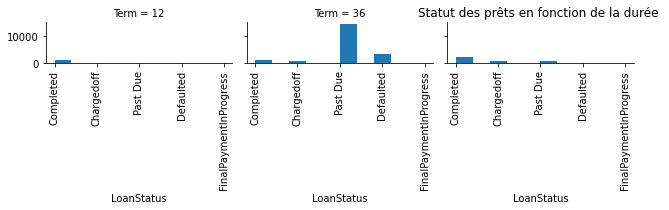

In [156]:
# Tracer le diagramme à barres
# sb.countplot(data = df2, x = 'Term', hue = 'LoanStatus') ;
# plt.xticks(rotation=0);
# plt.title("Relation entre LoanStatus prêts par durée en mois")
# plt.show()

# #Tracer la FacetGrid pour montrer les relations une variable qualitative et une variable numérique
# bin_edges = np.arange(12, df2.Term.max()+12, 6)
g = sb.FacetGrid(data = df2, col = 'Term' , col_wrap=3)
plt.xticks(rotation=90);
g.map(plt.hist, "LoanStatus");
# Pour roter les axes du graphique facetté
rotate_xticklabels()
plt.title('Statut des prêts en fonction de la durée ');

### Observations 
- Les prêts à court terme ( 12 mois) ont le taux de remboursement le plus élévé
- Les prêts à moyen terme ont une très fort taux de retard et de defaut de payement ; ils ont le plus faible taux de remboursement à dans les délais

### Quelle est la relation entre le statut des prêts et le revenue annuel du prêteur (IncomeRange) ?

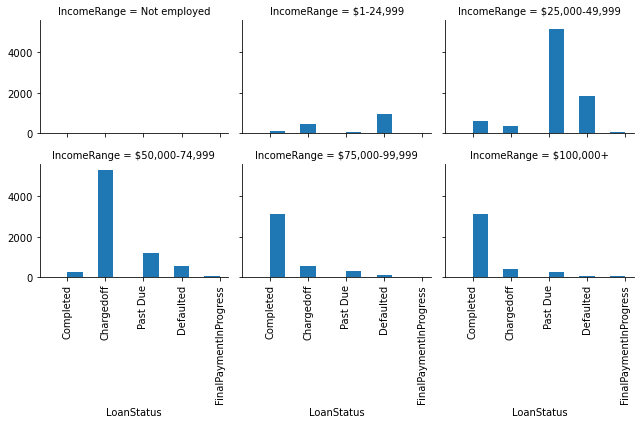

In [157]:
# #Tracer la FacetGrid pour montrer les relations une variable qualitative et une variable numérique
g = sb.FacetGrid(data = df2, col = 'IncomeRange' , col_wrap=3)
g.map(plt.hist, "LoanStatus");
# Pour roter les axes du graphique facetté
rotate_xticklabels()

### Observations 
- Ceux ayant un revenu dans la tranche \$1-24999  ont ont un taux de défaut de payement très élévé ( supérieure à 60%)
- Ceux ayant un revenu dans la tranche $25000-49999 ont ont un taux de retard de payement très élévé (le plus élévé)
- Ceux ayant un revenu dans la tranche \$50000-74999 ont ont un taux de défaut de Chargeoff très élévé ( supérieure à 60%)
- Ceux ayant un revenu supérieur à 75000 ont les meilleurs taux de remboursement dans les délais 

### Quelle est la relation entre le statut des prêts (LoanStatus) et le risque (ProsperRatingAlpha)  ?

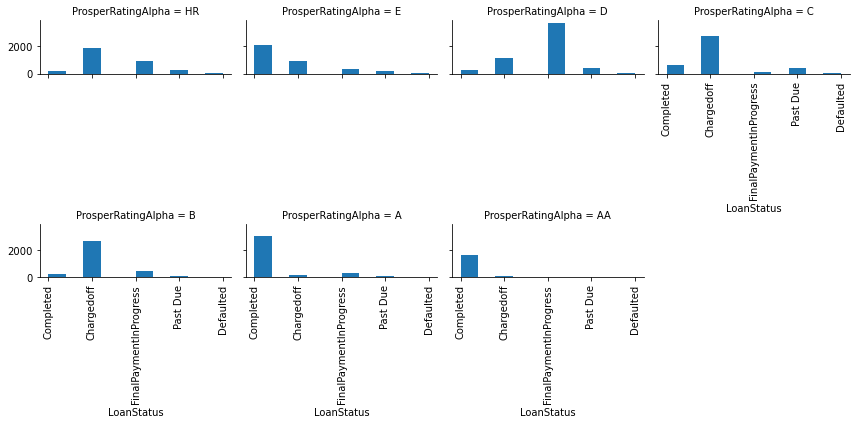

In [158]:
# #Tracer la FacetGrid pour montrer les relations une variable qualitative et une variable numérique
g = sb.FacetGrid(data = df2, col = 'ProsperRatingAlpha' , col_wrap=4)
g.map(plt.hist, "LoanStatus");
# Pour roter les axes du graphique facetté
rotate_xticklabels()

### Observations 
- Plus le risque est faible, plus les taux de remboursemnt dans les délais augmente et les taux de défaut et de retard diminue , Donc le système de notation des risque est bon


In [64]:
# Transformation de la target en numérique
target='LoanStatus'
targetNumeric='LoanStatusNumeric'

# Selection des colonnes numériques
# numeric_vars = ['Term', 'BorrowerAPR', 'EstimatedReturn', 'EmploymentStatusDuration', 'CreditScoreRangeLower', 'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TradesNeverDelinquentPercentage']

numeric_vars =df2.select_dtypes(include=np.number).columns.tolist() 
print(numeric_vars)

# categoric_vars = [ 'BorrowerState', 'Occupation', 'EmploymentStatus',  'LoanOriginationQuarter','IncomeRange','ProsperRatingAlpha','ProsperScore','semester','year']
categoric_vars = df2.select_dtypes(exclude=np.number).columns.tolist() 
print(categoric_vars)

print(len(set(numeric_vars).intersection(set(categoric_vars))))

df2['LoanStatusNumeric'] = df2['LoanStatus'].astype('category').cat.codes

numeric_vars

['Term', 'EstimatedEffectiveYield', 'EstimatedReturn', 'CurrentCreditLines', 'TotalCreditLinespast7years', 'CurrentDelinquencies', 'DelinquenciesLast7Years', 'DebtToIncomeRatio', 'LoanOriginalAmount']
['LoanStatus', 'ProsperRatingAlpha', 'ProsperScore', 'BorrowerState', 'Occupation', 'EmploymentStatus', 'FirstRecordedCreditLine', 'IncomeRange', 'LoanOriginationQuarter', 'semester', 'year']
0


['Term',
 'EstimatedEffectiveYield',
 'EstimatedReturn',
 'CurrentCreditLines',
 'TotalCreditLinespast7years',
 'CurrentDelinquencies',
 'DelinquenciesLast7Years',
 'DebtToIncomeRatio',
 'LoanOriginalAmount']

### Quelle est la relation entre LoanStatus et les variables numéiques ?

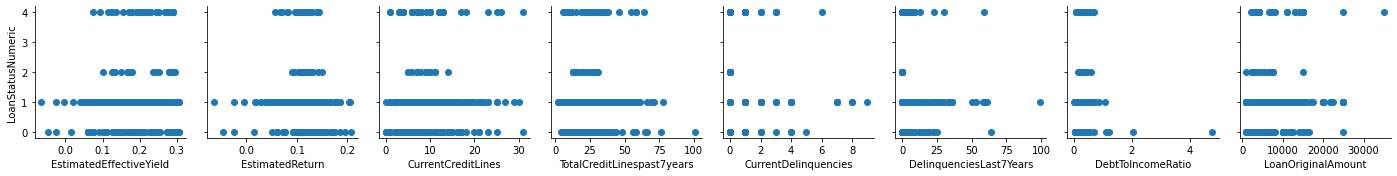

In [65]:
# plot matrix: sample 500 loan so that plots are clearer and
# they render faster
if 'Term' in numeric_vars:
    numeric_vars.remove('Term')
samples = np.random.choice(df2.shape[0], 500, replace = False)
df2_samp = df2.iloc[samples,:]

g = sb.PairGrid(data = df2_samp, y_vars=['LoanStatusNumeric'], x_vars= numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);


In [66]:
df2.LoanStatus.value_counts()

Completed                 17674
Chargedoff                 4443
Past Due                   1843
Defaulted                   884
FinalPaymentInProgress      187
Name: LoanStatus, dtype: int64

In [67]:
df2.LoanStatusNumeric.value_counts()

1    17674
0     4443
4     1843
2      884
3      187
Name: LoanStatusNumeric, dtype: int64

### Observations :
- Les prêts remboursés sont donminant ;
- Plus le ratio DebtToIncomeRatio augment, plus le risque de retard de payement et de defaut de payement augment

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The relationships I observed in this part of the survey have been highlighted after each graph;


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I did not notice any particular relationship between the variables other than the main variable

## Multivariate Exploration

### Matrice de corrélation

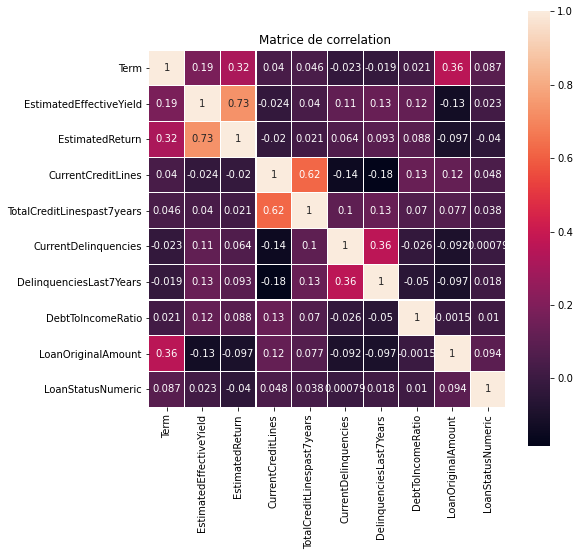

In [68]:
plt.figure(figsize=(8,8))
sb.heatmap(df2.corr(),linewidths=0.1, 
            square=True,  linecolor='white', annot=True)
plt.title('Matrice de correlation ')
plt.show()

### Observations :
- Les corrélations entre notre target (LoanStatus) et les autres très faibles ( moins de 10 pour toutes)

- La corrélation entre l'Estimation du retour su investissement (EstimatedEffectiveYield) et la durée est corrélée à 32% ; elle est de 73% entre EstimatedEffectiveYield et EstimatedReturn

### Quelle est la relation entre LoanStatus , la durée (Terme) et le risque (ProsperRatingAlpha) ?

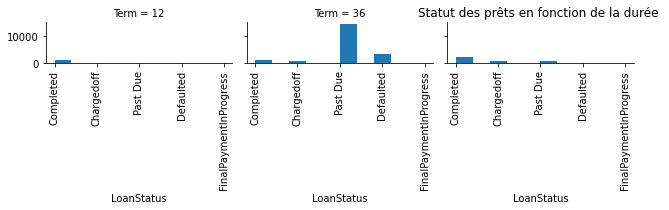

In [89]:
# #Tracer la FacetGrid pour montrer les relations une variable qualitative et une variable numérique
# bin_edges = np.arange(12, df2.Term.max()+12, 6)
g = sb.FacetGrid(data = df2, col = 'Term' , col_wrap=3)
plt.xticks(rotation=90);
g.map(plt.hist, "LoanStatus");
rotate_xticklabels()
plt.title('Statut des prêts en fonction de la durée ');

In [70]:
df2.EstimatedReturn

12        0.0740
15        0.1246
23        0.1051
26        0.1248
27        0.0608
           ...  
113913    0.0717
113928    0.1147
113929    0.1093
113933    0.0807
113935    0.1595
Name: EstimatedReturn, Length: 25031, dtype: float64



### Quelles sont les relations entre LoanStatus , LoanOriginalAmount, DebtToIncomeRatio et Term ?


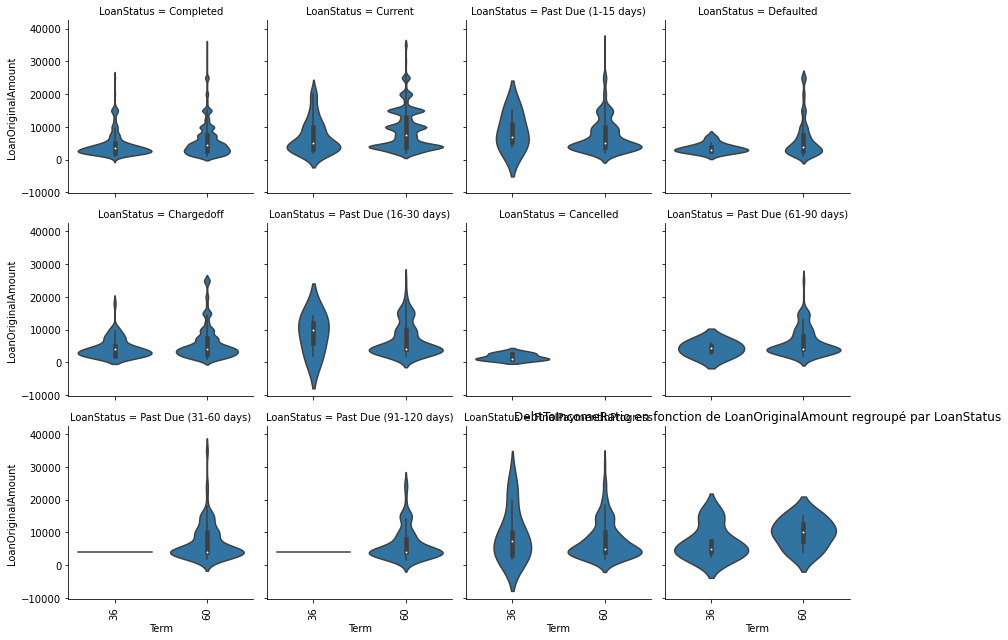

In [95]:
g = sb.FacetGrid(data = df, col = 'LoanStatus' , col_wrap=4,margin_titles = True)
g.map(sb.violinplot,'Term','LoanOriginalAmount')
# Pour roter les axes du graphique facetté
rotate_xticklabels()
plt.title('DebtToIncomeRatio en fonction de LoanOriginalAmount regroupé par LoanStatus');

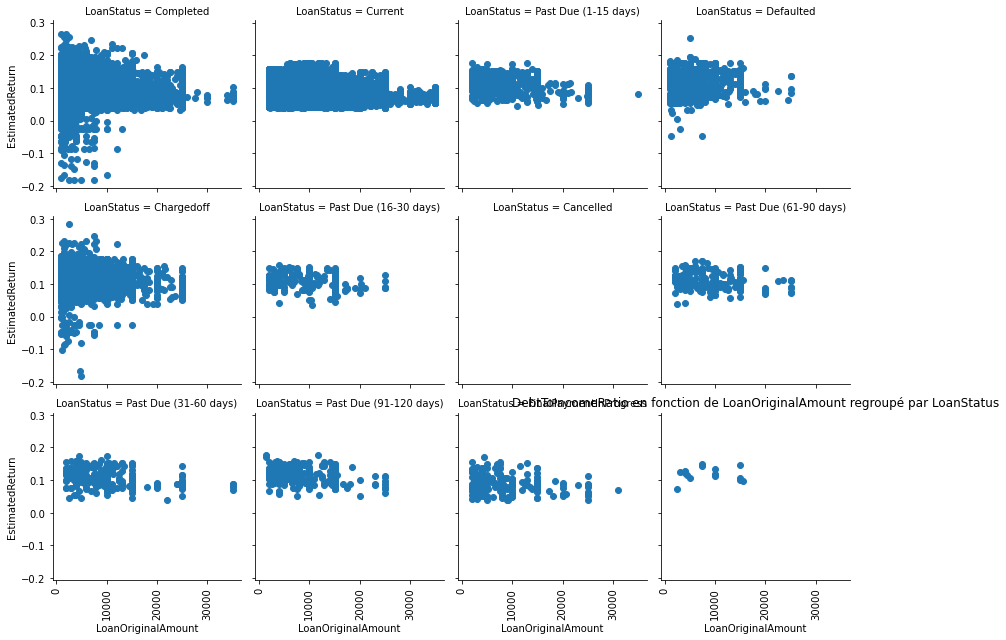

In [91]:
g = sb.FacetGrid(data = df, col = 'LoanStatus' , col_wrap=4,margin_titles = True)
g.map(plt.scatter,'LoanOriginalAmount','EstimatedReturn')
# Pour roter les axes du graphique facetté
rotate_xticklabels()
plt.title('DebtToIncomeRatio en fonction de LoanOriginalAmount regroupé par LoanStatus');

### Observations 
 - RAS
 
 ### Quelles sont les relations entre LoanStatus par semester et par year ?

In [73]:
df2.year = df2.year.astype('float')

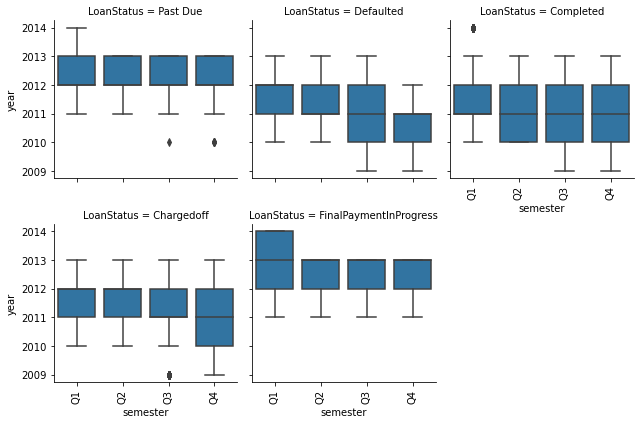

In [92]:
g = sb.FacetGrid(data = df2, col = 'LoanStatus' , col_wrap=3,margin_titles = True)
g.map(sb.boxplot,'semester','year')
# Pour roter les axes du graphique facetté
rotate_xticklabels()
# plt.title('DebtToIncomeRatio en fonction de LoanOriginalAmount regroupé par LoanStatus');

### Observations :
- Les prêts les moins remboursés dans les délais sont ceux contracté au premier semestre
- Les prêts avec les plus de defaut de payement sont ceux contracté au troisième semestre

In [75]:
df2.columns

Index(['Term', 'LoanStatus', 'EstimatedEffectiveYield', 'EstimatedReturn',
       'ProsperRatingAlpha', 'ProsperScore', 'BorrowerState', 'Occupation',
       'EmploymentStatus', 'FirstRecordedCreditLine', 'CurrentCreditLines',
       'TotalCreditLinespast7years', 'CurrentDelinquencies',
       'DelinquenciesLast7Years', 'IncomeRange', 'LoanOriginationQuarter',
       'DebtToIncomeRatio', 'LoanOriginalAmount', 'semester', 'year',
       'LoanStatusNumeric'],
      dtype='object')

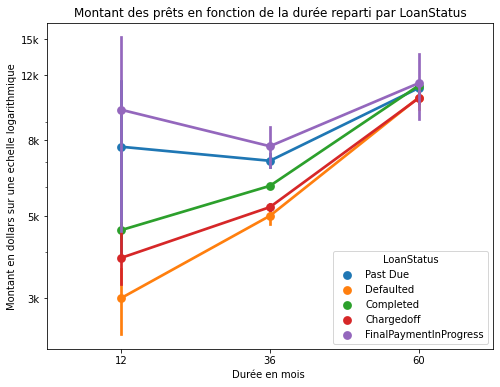

In [93]:
plt.figure(figsize = [8,6])

ax = sb.pointplot(data = df2, x = 'Term', y = 'LoanOriginalAmount', hue = 'LoanStatus')

# special handling of tick marks following seaborn function - you might try
# doing a log transform on the data itself instead of this workaround.
plt.yscale('log')
plt.yticks([3000, 5000, 8000,12000,15000], ['3k', '5k', '8k','12k','15k'])
ax.set_yticklabels([], minor = True)
plt.xlabel('Durée en mois ');
plt.ylabel('Montant en dollars sur une echelle logarithmique');
plt.title('Montant des prêts en fonction de la durée reparti par LoanStatus');
plt.show();

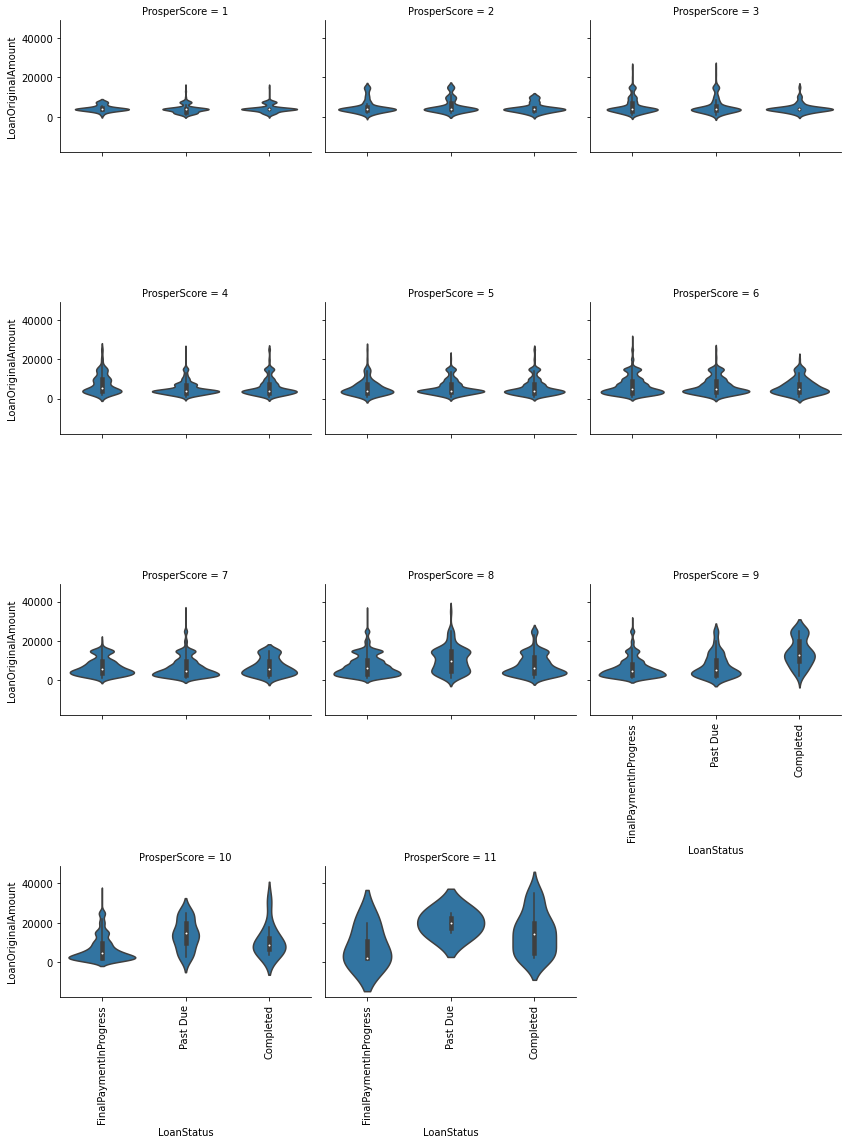

In [162]:
# plt.figure(figsize = [8,6])
# ax = sb.pointplot(data = df2, x = 'ProsperScore', y = 'LoanOriginalAmount', hue = 'LoanStatus')

# # special handling of tick marks following seaborn function - you might try
# # doing a log transform on the data itself instead of this workaround.
# plt.yscale('log')
# plt.yticks([3000, 5000, 8000,12000,15000], ['3k', '5k', '8k','12k','15k'])
# ax.set_yticklabels([], minor = True)
# plt.xlabel('Durée en mois ');
# plt.ylabel('Montant en dollars sur une echelle logarithmique');
# plt.title('Montant des prêts en fonction de la durée reparti par LoanStatus');
# plt.show();

g = sb.FacetGrid(data = df2, col = 'ProsperScore' , col_wrap=3,margin_titles = True,height=4,aspect=1)
g.map(sb.violinplot,'LoanStatus','LoanOriginalAmount')
# Pour roter les axes du graphique facetté
rotate_xticklabels()
# plt.title('DebtToIncomeRatio en fonction de LoanOriginalAmount regroupé par LoanStatus');

### Observations :
- Les prêts le moins risqués sont les plus remboursé à temps

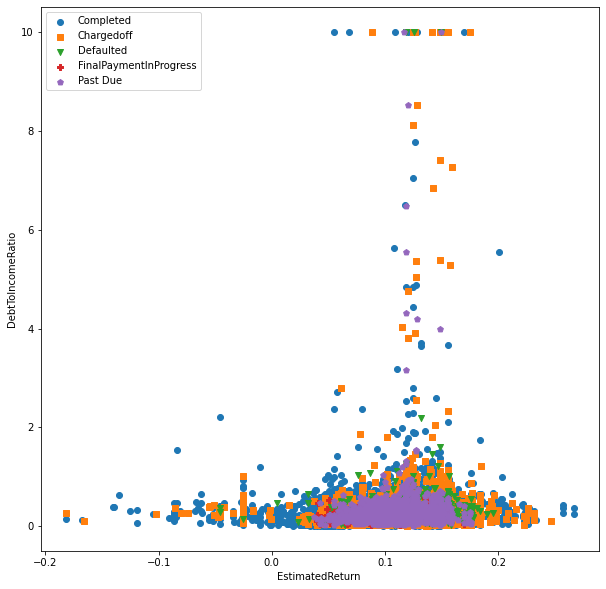

In [78]:
# multivariate plot of price by carat weight, and clarity
cat_markers = [
    ['Completed', 'o'],
    ['Chargedoff', 's'],
    ['Defaulted','v'],
    ['FinalPaymentInProgress','P'],
    ['Past Due','p']
]

bins_x = np.arange(0, df2['EstimatedReturn'].max()+0.2, 0.1) 
bins_y = np.arange(0, df2['DebtToIncomeRatio'].max()+1, 1)
plt.figure(figsize=(10,10))
for cat, marker in cat_markers:
    df_cat = df2[df2['LoanStatus'] == cat]
    plt.scatter(data = df_cat, x = 'EstimatedReturn', y = 'DebtToIncomeRatio', marker = marker)
plt.xlabel('EstimatedReturn ');
plt.ylabel('DebtToIncomeRatio');
plt.legend(['Completed', 'Chargedoff', 'Defaulted', 'FinalPaymentInProgress', 'Past Due']);

### Observations : 
- Le EstimatedReturn est dans la grande majorité des prêts est compris entre 0,0 et 0,2

## Conclusions
In this work, I maked analysis of prosperLoanData ; my work have 3 mains parts
- Data Wrangling
- Exploratory Data analysis with univarietes, bivariates and multivariaes visualisation
- Explanatory Data analysis

The original dataset have 113937 rows and 81 columns

After Dta Wrangling and Features selection,, we  have the following features :
- The Numerical Variables (11): 'Term', 'BorrowerAPR', 'EstimatedReturn', 'EmploymentStatusDuration', 'CreditScoreRangeLower', 'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TradesNeverDelinquentPercentage', 'DebtToIncomeRatio' , 'LoanOriginalAmount'.
- Categorical variables (10) : 'LoanStatus', 'ProsperRatingAlpha', 'ProsperScore', 'ListingCategoryNumeric', 'BorrowerState', 'Occupation', 'EmploymentStatus', 'IncomeRange', 'LoanOriginationQuarter'.
- Variables of type datetime (1) : 'FirstRecordedCreditLine

>In summary, the analyses showed that:
- As a client, having a well-paid job (salary >=50000 US dollars) increases your chances of getting a credit; 
- As a bank, the clients who repay their loans on time are those with an income >= 50,000 US dollars; That the work of nearly 25% of borrowers is not recorded, an effort must be made in this direction


> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

